In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu


report_date = datetime(2025, 12, 31)

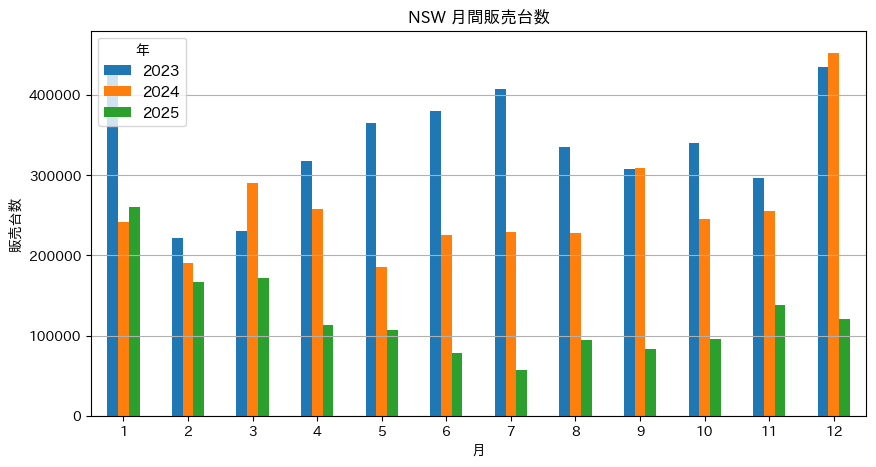

In [3]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date, 2), end=report_date)

In [48]:
this_year = 2025
df = df.drop(columns=[2023])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

year,2024,2025,YoY
month,,,
1,241282,260447,107.9%
2,190786,167188,87.6%
3,289673,171921,59.4%
4,257515,113513,44.1%
5,185821,106506,57.3%
6,225316,78097,34.7%
7,229316,57532,25.1%
8,227913,94517,41.5%
9,308404,82946,26.9%


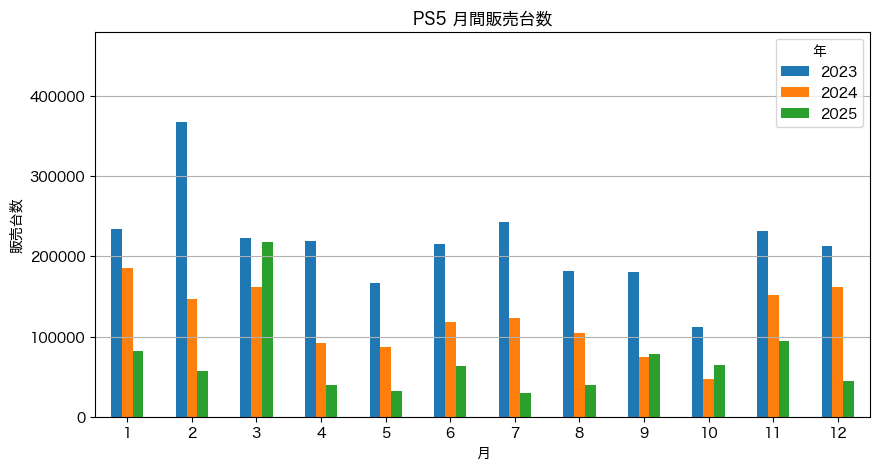

In [49]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [50]:
this_year = 2025
df = df.drop(columns=[2023])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

year,2024,2025,YoY
month,,,
1,185480,81587,44.0%
2,146945,56886,38.7%
3,162281,218300,134.5%
4,91981,38983,42.4%
5,87218,32001,36.7%
6,117592,63516,54.0%
7,123087,28959,23.5%
8,104178,39004,37.4%
9,74523,78693,105.6%
